<p>El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:<p>
<li>Deberéis separar la X y la y.</li>
<li>Deberéis crear el train y el test.</li>
<li>Ajustar vuestro modelo.</li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd,Genre_map,Cert_map
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429,2,4.0
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227,2,4.0


In [3]:
X = df.drop(["Released_Year", 'Genre','Certificate', 'Runtime','Meta_score','No_of_Votes','IMDB_Rating','Gross','Rating_BOX'], axis = 1)
y = df["Rating_BOX"]

<p> Vamos a crear el train y el test </p>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
lr = LinearRegression(n_jobs=-1)

In [7]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
29,0.100485,0.100485,Train
535,0.100485,0.100485,Train
695,0.100485,0.100485,Train
557,0.100485,0.100485,Train
836,0.100485,0.100485,Train


In [10]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,0.100485,0.100485,Train,2.328786e-11
535,0.100485,0.100485,Train,5.490497e-12
695,0.100485,0.100485,Train,-1.935127e-11
557,0.100485,0.100485,Train,2.774142e-12
836,0.100485,0.100485,Train,-2.774160e-11


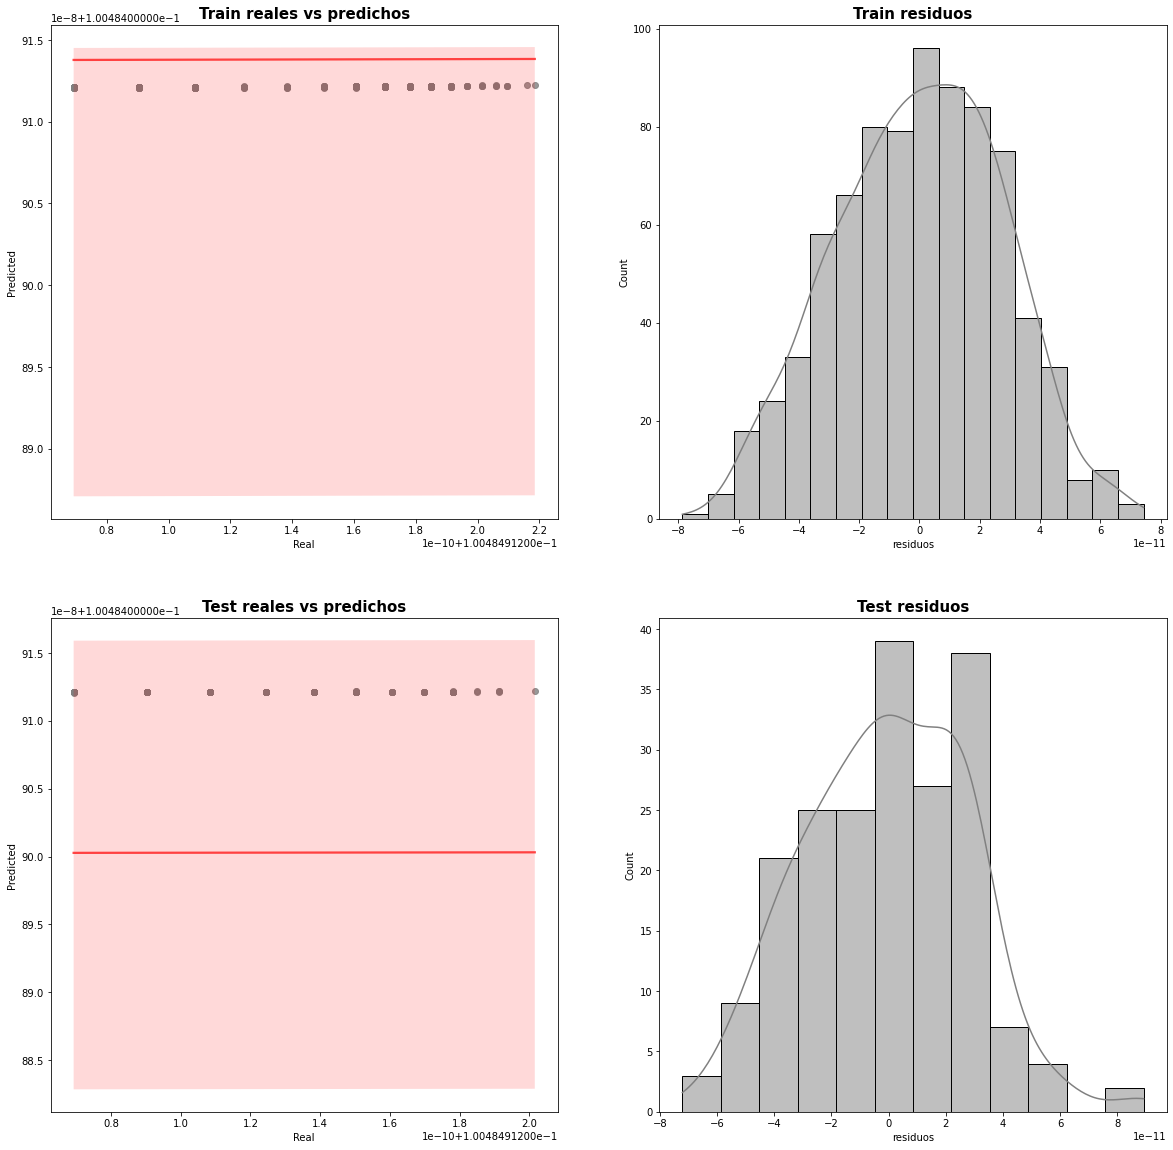

In [11]:
# Ajustamos el modelo 

fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");
